# Intertemporal Choice

We will do a simple two-period model, show how to solve for optimal consumption and saving. 

In [0]:
import numpy as np 
from matplotlib import pyplot as plt

Incomes in the two periods are given by $y_0$ and $y_1$ while the discount factor is $\delta$. Utility is of the power form: 

$$ u(C) = \frac{C^{1-\tfrac{1}{\sigma}}-1}{1-\tfrac{1}{\sigma}} $$

$\sigma$ is the intertemporal elasticity of substitution. 

In [0]:
y0 = 50e3
y1 = 25e3
delta = 0.95
sigma = 2.0
r = 0.03

Let's program up the utility function and the marginal utility function. 

In [0]:
def u(cons, sigma):
  if sigma!=1.0:
    return (cons**(1.0-1/sigma)-1.0)/(1-1/sigma)
  else :
    return np.log(cons)

def mu(cons,sigma):
  if sigma!=1.0:
    return cons**(-1/sigma)
  else :
    return 1/cons

Next up, discounted utility. What is not consumed in the first period is automatically consumed in the second period. 

In [0]:
def Du(cons,delta,sigma,y0,y1,r):
  return u(cons,sigma) + delta*u((1+r)*(y0-cons)+y1,sigma)

We can look for a maximum over a grid. 

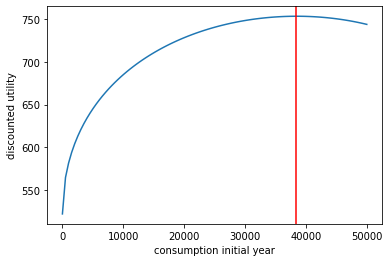

In [5]:
gridc = np.linspace(0.1,y0-0.1,100)
plt.figure()
Dus = [Du(c,delta,sigma,y0,y1,r) for c in gridc]
iopt = np.argmax(Dus)
copt = gridc[iopt]
plt.plot(gridc,Dus)
plt.axvline(x=copt,color='r')
plt.xlabel('consumption initial year')
plt.ylabel('discounted utility')
plt.show()

## Solving Euler Equation

Best way to solve for optimal consumption is to solve the Euler equation: 

$$ u'(C_0) = R\delta u'((1+r)(y_0-C_0)+y_1) $$ 



In [0]:
from scipy.optimize import bisect
from functools import partial

In [0]:
def euler(cons,delta,sigma,y0,y1,r):
    mu1 = mu(cons,sigma)
    mu2 = mu((1+r)*(y0-cons)+y1,sigma)
    return mu1 - (1+r)*delta*mu2

In [0]:
eu = partial(euler,delta=delta,sigma=sigma,y0=y0,y1=y1,r=r)

In [14]:
eu(39e3)

-6.99753269455955e-05

In [15]:
copt = bisect(eu,y0*0.01,0.99*y0)
copt 

38491.2971302977

In [16]:
sopt = y0 - copt
sopt

11508.702869702298

## Saving Response to Change in Interest Rate

Taking log of the Euler equation we have: 

$$ \frac{\partial{\ln C}}{\partial{\ln r}} = \sigma $$ 

So the IES governs the substitution in consumption when $r$ changes. If $r$ doubles, the intertemporal substitution effect is to defer consumption to the second period (increase $C_1$ relative to $C_0$). But there is also an income effect. An increase in $r$ increases lifetime income. This increases both $C_0$ and $C_1$. Hence, the total effect is indeterminate. 

In [0]:
def optcons(delta,sigma,y0,y1,r):
  eu = partial(euler,delta=delta,sigma=sigma,y0=y0,y1=y1,r=r)
  copt = bisect(eu,y0*0.01,0.99*y0)
  return y0 - copt

In [0]:
rs = np.linspace(0.01,0.1,100)
saves = [optcons(delta,sigma,y0,y1,r) for r in rs]

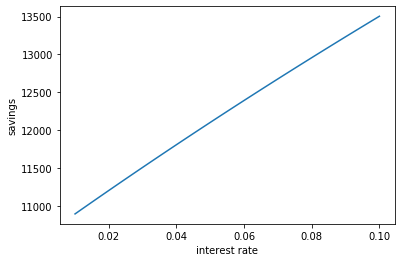

In [19]:
plt.figure()
plt.plot(rs,saves)
plt.xlabel('interest rate')
plt.ylabel('savings')
plt.show()

Now let's do for different values of $\sigma$. 

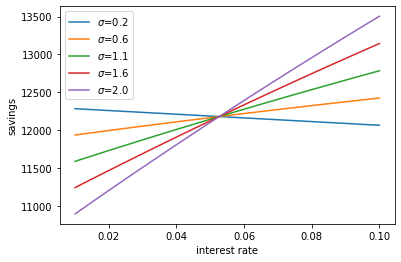

In [20]:
sigmas = np.linspace(0.2,2.0,5)
plt.figure()
for s in sigmas:
  saves = [optcons(delta,s,y0,y1,r) for r in rs]
  plt.plot(rs,saves,label='$\sigma$='+str(np.round(s,1)))
plt.xlabel('interest rate')
plt.ylabel('savings')
plt.legend()
plt.show()

The larger the IES, the more positive is the reaction of savings to the interest rate. 